<a href="https://www.kaggle.com/code/aisuko/visualization-with-pca-and-t-sne?scriptVersionId=175066482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Let's use Kmeans on the banking dataset. In this notbeooks, we will use Elbow Method to choose the number of cluster, and Silhoutte visualization to check the optimal number of the clusters. 


# Preprocessed

We preprocess the dataset. It consists of converting categorical variables into numeric ones. We are going to apply Onehot encoder for the nominal variables and a OrderinalEncoder for the ordinals features(like: education).

We will try to ensure that the numerical variables have a Gaussian distribution. For them we will apply a PowerTransformer.

In [1]:
!pip install -U -q pyod==1.1.3
!pip install -U -q prince==0.13.0

In [2]:
import pandas as pd

df=pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv", sep=";")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
df=df.iloc[:,0:8]
df.head()

age           job  marital  education default  balance housing loan
0   58    management  married   tertiary      no     2143     yes   no
1   44    technician   single  secondary      no       29     yes   no
2   33  entrepreneur  married  secondary      no        2     yes  yes
3   47   blue-collar  married    unknown      no     1506     yes   no
4   33       unknown   single    unknown      no        1      no   no

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer

# For converting categorical feature to features.
onehot_transformer=Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
])

# For converting categorical features to such integer codes
ordinal_transformer=Pipeline(
    steps=[("encoder", OrdinalEncoder())
])

# Power transforms are a family of parametric, monotonic transformation that aim to map data from any
# distribution to as close to a Gaussian distribution as possible in order to stabilize variance
# and minimize skewness
power_transformer=Pipeline(
    steps=[("encoder", PowerTransformer())
])

# We use ColumnTransformer to apply transformers to columns of an array or pandas DataFrame
preprocessor=ColumnTransformer(
    transformers=[
        ("onehot_transformer", onehot_transformer, ["default", "housing", "loan", "job", "marital"]),
        ("ordinal_transformer", ordinal_transformer, ["education"]),
        ("power_transformer", power_transformer, ["age", "balance"])
    ]
)

In [5]:
pipeline=Pipeline(steps=[("preprocessor", preprocessor)])

pipe_fit=pipeline.fit(df)

data=pd.DataFrame(
    pipe_fit.transform(df),
    columns=pipe_fit.get_feature_names_out().tolist()
)

data.columns.tolist()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['onehot_transformer__default_yes',
 'onehot_transformer__housing_yes',
 'onehot_transformer__loan_yes',
 'onehot_transformer__job_blue-collar',
 'onehot_transformer__job_entrepreneur',
 'onehot_transformer__job_housemaid',
 'onehot_transformer__job_management',
 'onehot_transformer__job_retired',
 'onehot_transformer__job_self-employed',
 'onehot_transformer__job_services',
 'onehot_transformer__job_student',
 'onehot_transformer__job_technician',
 'onehot_transformer__job_unemployed',
 'onehot_transformer__job_unknown',
 'onehot_transformer__marital_married',
 'onehot_transformer__marital_single',
 'ordinal_transformer__education',
 'power_transformer__age',
 'power_transformer__balance']

In [6]:
data.head(10)

onehot_transformer__default_yes  onehot_transformer__housing_yes  \
0                              0.0                              1.0   
1                              0.0                              1.0   
2                              0.0                              1.0   
3                              0.0                              1.0   
4                              0.0                              0.0   
5                              0.0                              1.0   
6                              0.0                              1.0   
7                              1.0                              1.0   
8                              0.0                              1.0   
9                              0.0                              1.0   

   onehot_transformer__loan_yes  onehot_transformer__job_blue-collar  \
0                           0.0                                  0.0   
1                           0.0                                  0.0   
2                           1.0                                  0.0   
3                           0.0                                  1.0   
4                           0.0                                  0.0   
5                           0.0                                  0.0   
6                           1.0                                  0.0   
7                           0.0                                  0.0   
8                           0.0                                  0.0   
9                           0.0                                  0.0   

   onehot_transformer__job_entrepreneur  onehot_transformer__job_housemaid  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   1.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   
5                                   0.0                                0.0   
6                                   0.0                                0.0   
7                                   1.0                                0.0   
8                                   0.0                                0.0   
9                                   0.0                                0.0   

   onehot_transformer__job_management  onehot_transformer__job_retired  \
0                                 1.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
5                                 1.0                              0.0   
6                                 1.0                              0.0   
7                                 0.0                              0.0   
8                                 0.0                              1.0   
9                                 0.0                              0.0   

   onehot_transformer__job_self-employed  onehot_transformer__job_services  \
0                                    0.0                               0.0   
1                                    0.0                               0.0   
2                                    0.0                               0.0   
3                                    0.0                               0.0   
4                                    0.0                               0.0   
5                                    0.0                               0.0   
6                                    0.0                               0.0   
7                                    0.0                               0.0   
8                                    0.0            

# Outliers

It is crucial that there are as few outliers in our data as Kmeans is very sensitive to this. We can apply the typical method of choosing outliers using the z score. Here, we will use the Python Outlier Detection library. It is focused on detecting outliters for different cases. To be more specific we will use the ECOD method("empirical cumulative distribution functions for outlier detection").

In [7]:
# This method seels to obtain the distribution of the data 
# and this know which are the values where the probability density is lower(outliers).

from pyod.models.ecod import ECOD

clf=ECOD()
clf.fit(data)
outliers=clf.predict(data)

data["outliers"]=outliers

# data without outliers
data_no_outliers=data[data["outliers"]==0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

print(data_no_outliers.shape)
print(data_with_outliers.shape)

(40690, 19)
(45211, 19)


In [8]:
df["outliers"] = outliers
# Original Data with Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)
print(df_no_outliers.shape)

(40690, 8)


# Modeling

One of the disadvantages of using the Kmeans algorithm is that we must choose the number of clusters we want to use. So, we will use Elbow Method. It consists of calculating the distorition that exists between the points of a cluster and its centroid.

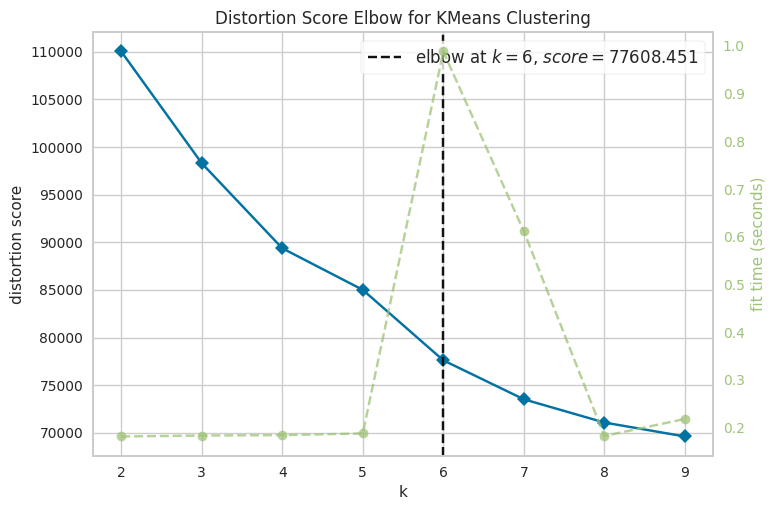

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show() 

# Optimization

We can perform Silhoutte visualization to check the optimal number of clusters.

In [10]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

# data visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np

def make_Silhouette_plot(X, n_clusters):
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg,
    )
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
        plt.xlabel("The silhouette coefficient values", fontsize=24)
        plt.ylabel("Cluster label", fontsize=24)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    print(f"N cluster: {n_clusters}")
    make_Silhouette_plot(data_no_outliers, n_clusters)   
    plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.18112038570087008
N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.1678772365672164
N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.1583339516592189
N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.16728150772466896
N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.15673800169997817
N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.14952635264854303
N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.15241441965401442
N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.14650206459561055


In [11]:
!ls

Silhouette_plot_2.png  Silhouette_plot_5.png  Silhouette_plot_8.png
Silhouette_plot_3.png  Silhouette_plot_6.png  Silhouette_plot_9.png
Silhouette_plot_4.png  Silhouette_plot_7.png  __notebook__.ipynb


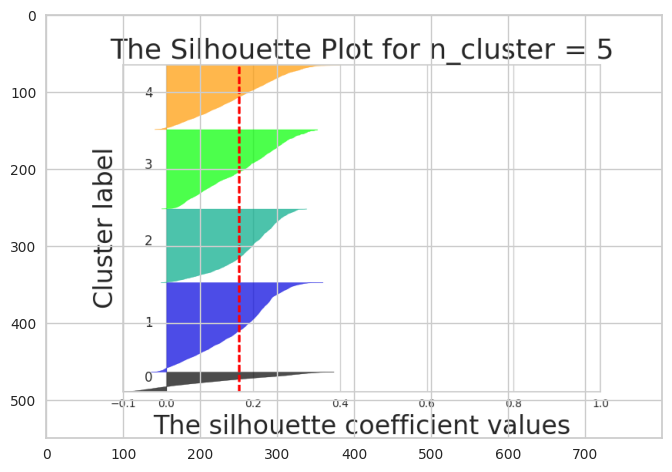

In [12]:
from PIL import Image

img=Image.open('/kaggle/working/Silhouette_plot_5.png').convert('RGB')
img=np.asarray(img)
plt.imshow(np.array(img))

After viewing the previous representations, we can choose a reasonable value of K. Here, we choose K=5.

In [13]:
km = KMeans(n_clusters=5,
            init='k-means++', 
            n_init=10,
            max_iter=100, 
            random_state=42)

clusters_predict = km.fit_predict(data_no_outliers)
clusters_predict

array([0, 4, 2, ..., 0, 1, 2], dtype=int32)

In [14]:
np.unique(clusters_predict)

array([0, 1, 2, 3, 4], dtype=int32)

# Evaluation

Three ways of evaluating kmeans models is somewhat more open that for other models, like:

* metrics
* visualization
* interpretation

Here we will use the model evaluation metrics,like

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similat cluster,
where similarity is the ratio of within-clsuter distances to between-cluster distances
"""

print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")


"""
Calinski Harabaz Index -> Variance Ratio Criterion.

Calinski Harabaz Index is defined as the ratio of the 
sum of between-cluster dispersion and of within-cluster dispersion.

The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of 
fit of a clustering algorithm, but can also be used as 
a method for determining an optimal value of k (see here for more).

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very 
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 1.6775659296391374
Calinski Score: 6914.724747148267
Silhouette Score: 0.1672869940907178


As far as can be shown, we do not have an excessively good model. Davies' score is telling us that the distance between clusers is quite small.

# Visualizarion

Here we use the method to **reduce dimensionality, PCA**. For them we are going to use the Prince library, focused on exploratory analysis and dimensionality reduction.

In [16]:
# Calculation the principal components in 2D and 3D

import prince
import plotly.express as px

def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df, 
                        x=columns[0], 
                        y=columns[1], 
                        z=columns[2],
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df, 
                        x=columns[0], 
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()
    
    
# PCA 3D

pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              2.245        11.81%                     11.81%
1              1.774         9.34%                     21.15%
2              1.298         6.83%                     27.98%


## PCA 2D

In [17]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



It can be seen that the clusters have almost no separation between them and there is no clear divison. This is in accordance with the information provided by the metrics.


## Waht is the variability of the PCA executed?

From the result above,

```
The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              2.245        11.81%                     11.81%
1              1.774         9.34%                     21.15%
2              1.298         6.83%                     27.98%
```

We can see that PCA is not capable of capturing more complex relationships due to it is a linear algorithm. So, we need to find another method to fit the more complex polynomial relationships.


# t-SNE

Tips: It has a higher computational cost.

In [18]:
# from sklearn.manifold import TSNE

# sampling_data = data_no_outliers.sample(frac=0.5, replace=True, random_state=1)
# sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

# df_tsne_3d = TSNE(
#                   n_components=3, 
#                   learning_rate=500, 
#                   init='random', 
#                   perplexity=200, 
#                   n_iter = 5000,
#                   n_jobs=-1).fit_transform(sampling_data)

# df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
# df_tsne_3d["cluster"] = sampling_clusters
# plot_pca_3d(df_tsne_3d, title = "T-SNE Space", opacity=1, width_line = 0.1)

# Explore the model works

Let's explore a little how the model works, in which features are the most important and what are the main characteristics of the clusters.

To see the importance of each of the variables we will use a typical “trick” in this type of situation. We are going to create a classification model where the “X” is the inputs of the Kmeans model, and the “y” is the clusters predicted by the Kmeans model.

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 40690, number of used features: 8
[LightGBM] [Info] Start training from score -1.626166
[LightGBM] [Info] Start training from score -1.292930
[LightGBM] [Info] Start training from score -1.412943
[LightGBM] [Info] Start training from score -2.815215
[LightGBM] [Info] Start training from score -1.489282


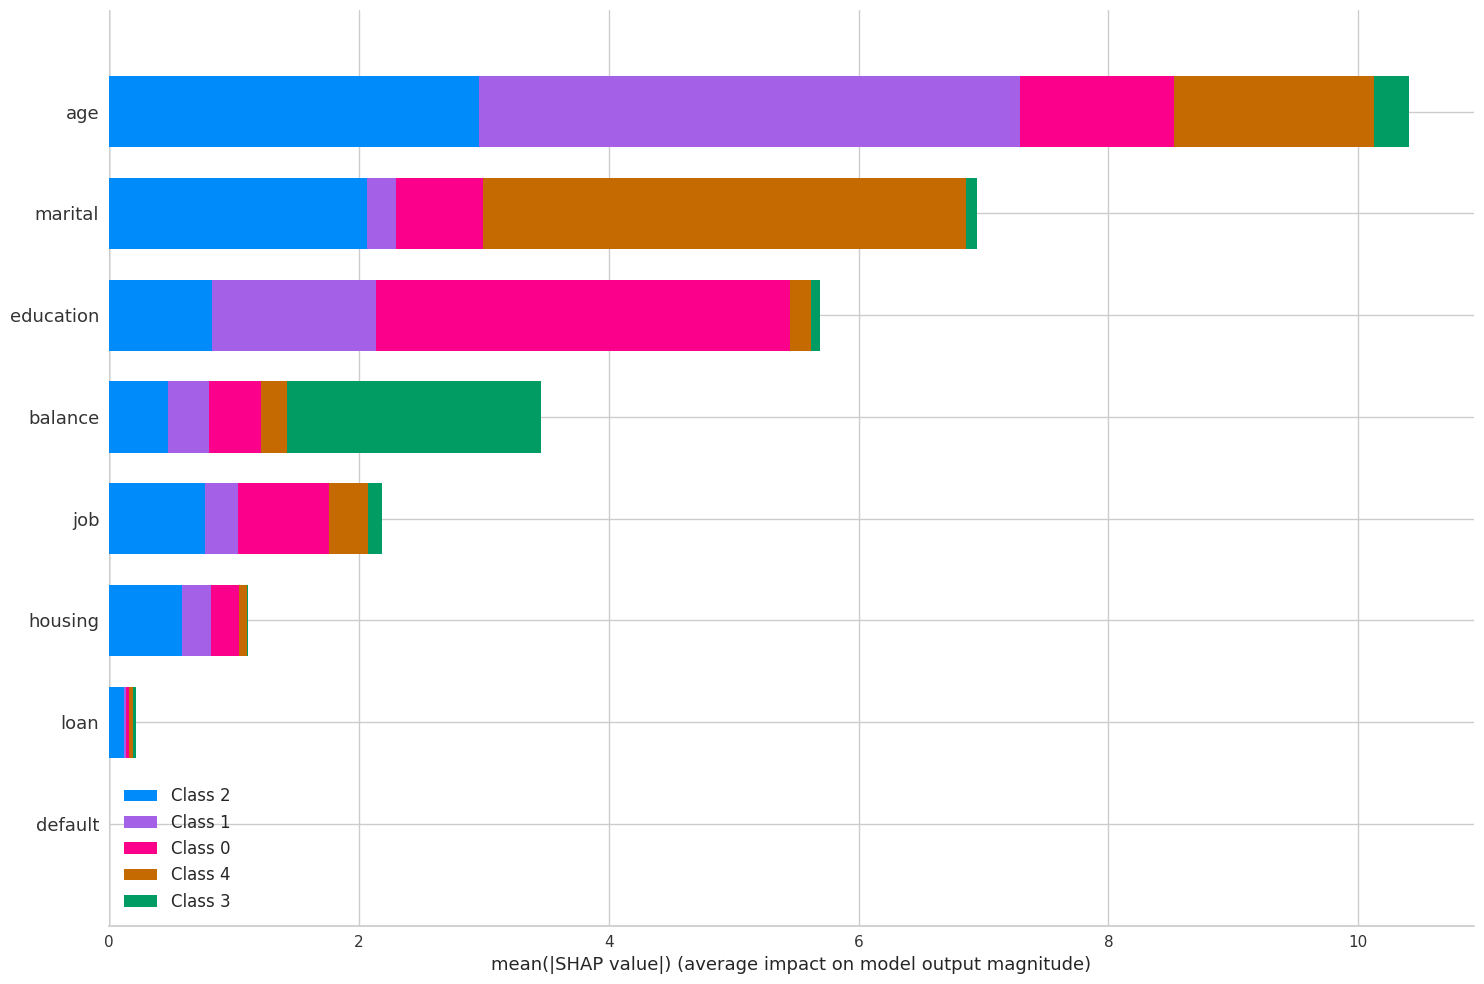

In [19]:
# this classifier works well having categorical and numberical variables.
import lightgbm as lgb

# obtain the importance of each of the features in the prediction
import shap

# We create the LGBMClassifier model and train it
clf_km = lgb.LGBMClassifier(colsample_by_tree=0.8)
for col in ["job", "marital", "education", "housing", "loan", "default"]:
    df_no_outliers[col] = df_no_outliers[col].astype('category')


clf_km.fit(X = df_no_outliers , y = clusters_predict, feature_name = "auto", categorical_feature = "auto")
# clf_km.fit(X = df_prueba, y = predict_embedding, feature_name='auto', categorical_feature = 'auto')
#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(df_no_outliers)
shap.summary_plot(shap_values_km, df_no_outliers, plot_type="bar", plot_size=(15, 10))

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf_km.predict(df_no_outliers)
accuracy=accuracy_score(y_pred, clusters_predict)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy))
print(classification_report(clusters_predict, y_pred))

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
Training-set accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8003
           1       1.00      1.00      1.00     11168
           2       1.00      1.00      1.00      9905
           3       1.00      1.00      1.00      2437
           4       1.00      1.00      1.00      9177

    accuracy                           1.00     40690
   macro avg       1.00      1.00      1.00     40690
weighted avg       1.00      1.00      1.00     40690



We can seen that the feature age has the greatest predictive power. And the cluster number 3 is mainly differentiated by the balance variable.


# Analaze the characteristics of the clusters

We are going to obtain the means(for the numerical variables) and the most frequent value(categorical variables) of each of the features of the dataset for the clusters:

In [21]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters_predict

df_no_outliers.groupby('cluster').agg(
    {
        'job': lambda x: x.value_counts().index[0],
        'marital': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'housing': lambda x: x.value_counts().index[0],
        'loan': lambda x: x.value_counts().index[0],
        # 'contact': lambda x: x.value_counts().index[0],
        'age':'mean',
        'balance': 'mean',
        'default': lambda x: x.value_counts().index[0],
        
    }
).sort_values("age").reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


cluster          job  marital  education housing loan        age  \
0        4   technician   single  secondary     yes   no  32.069740   
1        2  blue-collar  married  secondary     yes   no  34.569409   
2        3   management  married  secondary     yes   no  42.183012   
3        0   management  married   tertiary      no   no  43.773960   
4        1  blue-collar  married  secondary      no   no  50.220989   

       balance default  
0   794.696306      no  
1   592.025644      no  
2  7526.310217      no  
3   872.797951      no  
4   836.407504      no

We see that the clusters with job=blue-collar do not have a great differentiation between their characteristics, except by the age feature. This is something that is not desirable since it is difficult to differentiate the clients of each of the clusters. In the job=management case, we obtain better differentiation.

# Acknowledge

* https://towardsdatascience.com/mastering-customer-segmentation-with-llm-3d9008235f41
* https://kanoki.org/2021/05/11/show-images-in-grid-inside-jupyter-notebook-using-matplotlib-and-numpy/